<a href="https://colab.research.google.com/github/tuliobioinformata/tuliobioinformata/blob/main/ebac_churn_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Churn em uma empresa de Telecomunucações

A empresa XPTO-Telecom contratou você para ajudá-la com a detecção de clientes propensos a abandono de relacionamento (churn).

Ela forneceu uma base de dados de clientes, com informações separadas em três grupos:

* 1 - Dados demográficos

* 2 - Dados de serviços

* 3 - Dados de pagamento

Estes dados estão detalhados logo abaixo no dicionário de dados.

Seu objetivo é criar um modelo (classificador binário) para detecção de churn.

## Dicionário de dados

| **Variável**     | **Tipo** | **Definição**                                          | **Observação**                      |
|------------------|----------|--------------------------------------------------------|-------------------------------------|
| customerID       | string   | Código identificador do cliente                        |                                     |
| gender           | string   | Se o cliente é do sexo masculino ou feminino           | Female, Male                        |
| SeniorCitizen    | int      | Se o cliente é idoso                                   | 1: sim, 0: não                      |
| Partner          | string   | Se o cliente é um parceiro                             | Yes, No                             |
| Dependents       | string   | Se o cliente tem dependentes ou não                    | Yes, No                             |
| tenure           | int      | Número de meses que o cliente permaneceu na companhia  |                                     |
| PhoneService     | string   | Se o cliente contratou serviço de telefonia            | Yes, No                             |
| MultipleLines    | string   | Se o cliente tem multiplas linhs telefônicas           | Yes, No, No phone service           | 
| InternetService  | string   | Provedor de internet contratado pelo cliente           | DSL, Fiber optic, No                |
| OnlineSecurity   | string   | Se o cliente contratou o serviço de segurança online   | Yes, No, No internet service        |
| OnlineBackup     | string   | Se o cliente contratou o serviço de backup             | Yes, No, No internet service        |
| DeviceProtection | string   | Se o cliente contratou o seguro do dispositivo         | Yes, No, No internet service        |
| TechSupport      | string   | Se o cliente contratou o serviço de suporte            | Yes, No, No internet service        |
| StreamingTV      | string   | Se o cliente contratou o serviço de streaming de TV    | Yes, No, No internet service        |
| StreamingMovies  | string   | Se o cliente contratou o serviço de streaming de filmes| Yes, No, No internet service        |
| Contract         | string   | Tipo de plano contratado                               | Month-to-month, Two year, One year  |
| PaperlessBilling | string   | Se o cliente abriu mão de fatura impressa              | Yes, No                             |
| PaymentMethod    | string   | Meio de pagamento                                      | Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)|
| MonthlyCharges   | float    | Cobrança mensal                                        |                                     |
| TotalCharges     | float    | Cobrança total                                         |                                     |
| Churn            | string   | Se o cliente abandonou o relacionamento                | Yes, No                

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Quando iniciar este notebook pela primeira vez, descomente (remova o #) e execute os dois blocos abaixo. Depois comente novamente (coloque de volta o #).

In [ ]:
# pip install category_encoders

     |████████████████████████████████| 80 kB 3.6 MB/s 


In [ ]:
# pip install optuna

     |████████████████████████████████| 308 kB 3.8 MB/s 
     |████████████████████████████████| 81 kB 4.4 MB/s 
     |████████████████████████████████| 210 kB 12.3 MB/s 
     |████████████████████████████████| 78 kB 3.3 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 112 kB 37.1 MB/s 
     |████████████████████████████████| 146 kB 17.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c0f2579d6812570be4cd3bf84caa87899b0193fd53951da548d90fb0e818242d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
# Configurações de visualização
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Carregamento e preparação dos dados

In [ ]:
# Lê os dados de entrada:
df = pd.read_csv("https://drive.google.com/uc?id=1jsVCFySXWWdPzVc8W6UgLo_QbTNXOfih")

In [ ]:
# Verifica as 3 primeiras linhas:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# Verifica as 3 últimas linhas:
df.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# Verifica os tipos de dados:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Verifica a existência de valores ausentes:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Aparentemente não temos valores ausentes. 

Será que é verdade? E se houverem valores em branco em determinadas colunas? 

In [ ]:
# Substituindo possíveis valores em branco por NaN:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
# Verificando novamente os valores ausentes:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Bingo! A variável **TotalCharges** possui 11 registros ausentes. Vamos "anotar" para lidar com isso posteriormente.

Observamos também no dicionário de dados que **TotalCharges** deveria ser do tipo *float*. Vamos convertê-la!

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
# Verificando novamente os tipos:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Será que temos algum registro repetido no dataset?

In [ ]:
# Verificando se o número de IDs únicos é igual ao número total de registros
len(df['customerID'].unique()) == df['customerID'].shape[0]

True

Bom, me parece que não temos registros repetidos. Isto é ótimo!

Pensando em possíveis características (preditores) do modelo, descartaremos a **customerID**.

In [ ]:
# Removendo a coluna customerID do dataset:
df.drop(columns='customerID', inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Vamos agora dar uma olhada em cada uma das variáveis. Precisamos conhecê-las.



## Variáveis categóricas

### Variável resposta

Começaremos pela **Churn**, que é será a variável resposta do nosso modelo.

In [ ]:
# Verificando a frequência absoluta:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# Verificando a frequência relativa:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Percebemos que as classes estão desbalanceadas. Vamos anotar esta informação para lidarmos com isso posteriormente.

Para deixar as visualizações seguintes mais organizadas, vamos transformar o tipo da variável resposta.

In [ ]:
df['Churn'] = pd.Categorical(df['Churn'], categories=['No', 'Yes'])

### Dados demográficos

Vamos dar uma olhada na variável **gender** com relação à variável **Churn**

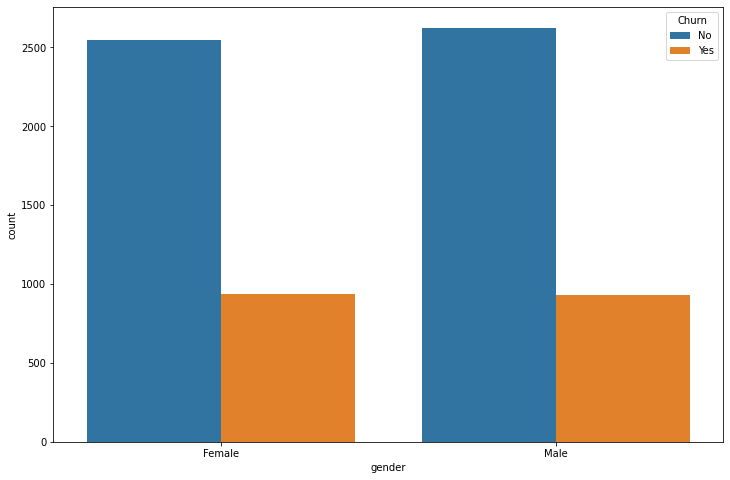

In [ ]:
sns.countplot(data=df, x='gender', hue='Churn')

Aparentemente a variável **gender**, de forma isolada, não explica o churn. Mas é importante lembrarmos que ela pode explicar de forma conjunta com outra variável. Mas por enquanto não investigaremos isso.

Verificando agora a **SeniorCitizen** com relação à **Churn**:

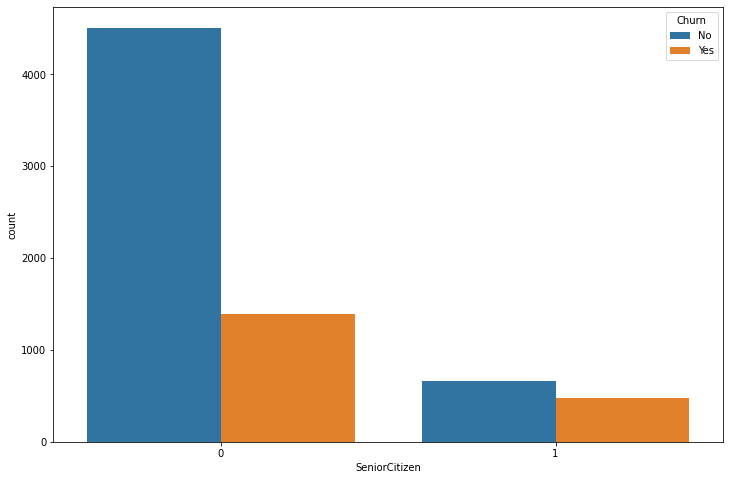

In [ ]:
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')

Percebemos aqui que há muito mais clientes não idosos (0) do que idosos (1), e que entre os idosos a proporção de churn (laranja) é bem maior do que entre os não idosos. 

Outra forma de analisar:

In [ ]:
# Verificando a propoção de churn por SeniorCitizen
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [ ]:
# Verificando as frequências absolutas
pd.crosstab(df['SeniorCitizen'], df['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


Percebe-se que entre os não idosos (0), a proporção de churn é de 23%. Já entre os idosos (1), a proporção de churn é de 41%, ou seja, quase o dobro!

Vamos deixar a SeniorCitizen no padrão das demais variáveis dicotômicas:

In [ ]:
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 0, 'No', 'Yes')

Verificando agora **Partner** com relação à **Churn**:

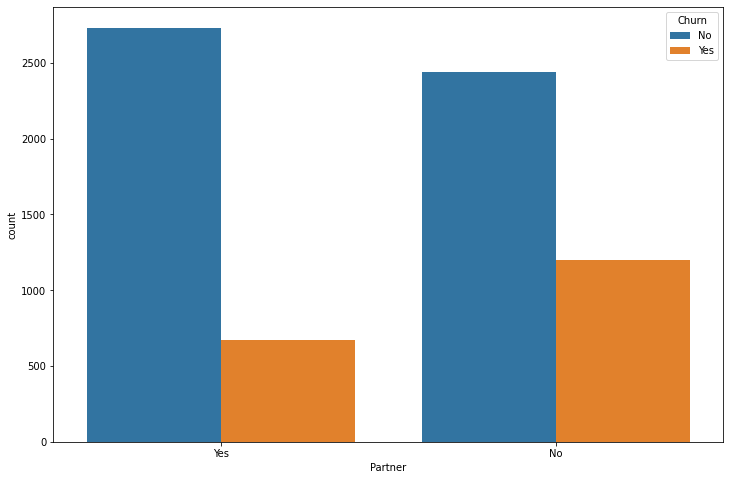

In [ ]:
sns.countplot(data=df, x='Partner', hue='Churn')

Aqui percebe-se que a taxa de churn é menor entre parceiros

Agora verificaremos **Dependents** com relação à **Churn**:

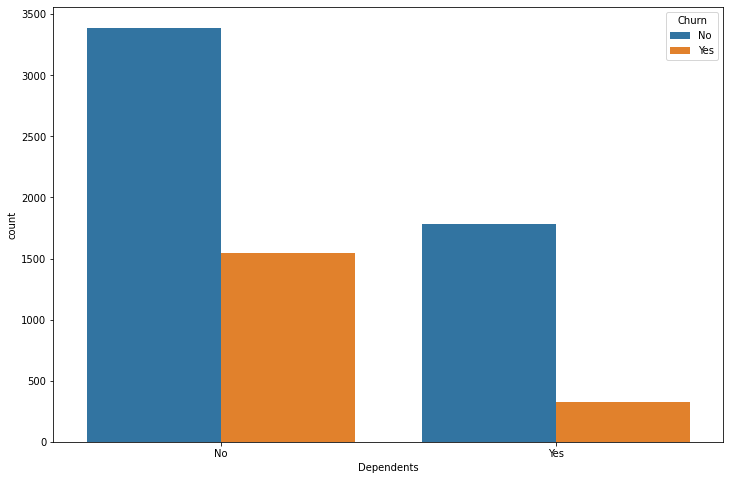

In [ ]:
sns.countplot(data=df, x='Dependents', hue='Churn')

Aqui percebe-se que a taxa de churn é menor entre clientes com dependentes 

### Dados de serviços

#### Exercício 1:

Analise, interprete as proporções das variáveis abaixo com relação ao churn. Se julgar necessário, proponha e realize transformações com foco na modelagem.

* PhoneService

* MultipleLines

* InternetService

* OnlineSecurity

* OnlineBackup

* DeviceProtection

* TechSupport

* StreamingTV

* StreamingMovies



### Exercício 2:

Aplique a codificação nas variáveis categóricas conforme os exemplos e justifique a sua escolha.

#### Exemplo Label Encoding:



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# cria um data frame para o exemplo:
df_encoding = df[['gender', 'Contract']].copy()

In [ ]:
df_encoding.head()

,gender,Contract
0,Female,Month-to-month
1,Male,One year
2,Male,Month-to-month
3,Male,One year
4,Female,Month-to-month


In [ ]:
# aplica o label encoding:
encoder = LabelEncoder()
df_encoding['gender_label'] = encoder.fit_transform(df['gender'])
df_encoding['Contract_label'] = encoder.fit_transform(df['Contract'])

In [ ]:
df_encoding.drop_duplicates().sort_values(by=['gender', 'Contract'])

,gender,Contract,gender_label,Contract_label
0,Female,Month-to-month,0,0
16,Female,One year,0,1
15,Female,Two year,0,2
2,Male,Month-to-month,1,0
1,Male,One year,1,1
11,Male,Two year,1,2


#### Exemplo Target Encoding:



In [ ]:
from category_encoders import TargetEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# cria um data frame para o exemplo:
df_encoding = df[['gender', 'Contract', 'Churn']].copy()

In [ ]:
# Transforma "No" e "Yes" em 1 e 0 na variável resposta:
df_encoding['Churn'] = np.where(df_encoding['Churn'] == "No", 0, 1)

encoder = TargetEncoder()
df_encoding['Contract_target'] = encoder.fit_transform(df_encoding['Contract'], df_encoding['Churn'])

encoder = TargetEncoder()
df_encoding['gender_target'] = encoder.fit_transform(df_encoding['gender'], df_encoding['Churn'])

In [ ]:
df_encoding.drop_duplicates().sort_values(by=['gender', 'Contract'])

,gender,Contract,Churn,Contract_target,gender_target
0,Female,Month-to-month,0,0.427097,0.269209
4,Female,Month-to-month,1,0.427097,0.269209
16,Female,One year,0,0.112695,0.269209
173,Female,One year,1,0.112695,0.269209
15,Female,Two year,0,0.028319,0.269209
336,Female,Two year,1,0.028319,0.269209
2,Male,Month-to-month,1,0.427097,0.261603
6,Male,Month-to-month,0,0.427097,0.261603
1,Male,One year,0,0.112695,0.261603
335,Male,One year,1,0.112695,0.261603


#### Exemplo One-Hot Encoding:

In [ ]:
# cria um data frame para o exemplo:
df_encoding = df[['gender', 'Contract']].copy()

In [ ]:
df_encoding = pd.get_dummies(df_encoding)

In [ ]:
df_encoding.drop_duplicates()

,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,0
1,0,1,0,1,0
2,0,1,1,0,0
11,0,1,0,0,1
15,1,0,0,0,1
16,1,0,0,1,0


#### Exemplo Dummy Encoding:

In [ ]:
# cria um data frame para o exemplo:
df_encoding = df[['gender', 'Contract']].copy()

In [ ]:
df_encoding = pd.get_dummies(df_encoding, drop_first=True)

In [ ]:
df_encoding.drop_duplicates()

,gender_Male,Contract_One year,Contract_Two year
0,0,0,0
1,1,1,0
2,1,0,0
11,1,0,1
15,0,0,1
16,0,1,0


Pra continuar com o exemplo, aplicaremos o One-Hot encoding. Mas esta escolha está sendo aleatória. Decida o melhor encoding e aplique

In [ ]:
# Aplicando o dummy encoding em todas as categóricas
# Atribuindo a um novo data frame para não perder os dados originais
df_new = pd.get_dummies(df)

In [ ]:
# Organizando a ordem das colunas:
first_column = df_new.pop('Churn_Yes')
df_new.insert(0, 'Churn', first_column)

In [ ]:
df_new.head()

,Churn,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No
0,0,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
1,0,34,56.95,1889.50,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1
2,1,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1
4,1,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [ ]:
# Caso tenha aplicado o One-Hot Encoding, remova a coluna Churn_no:
del(df_new['Churn_No'])

## Variáveis numéricas

Verificando o número de meses que o cliente ficou na companhia (**tenure**) com relação ao churn

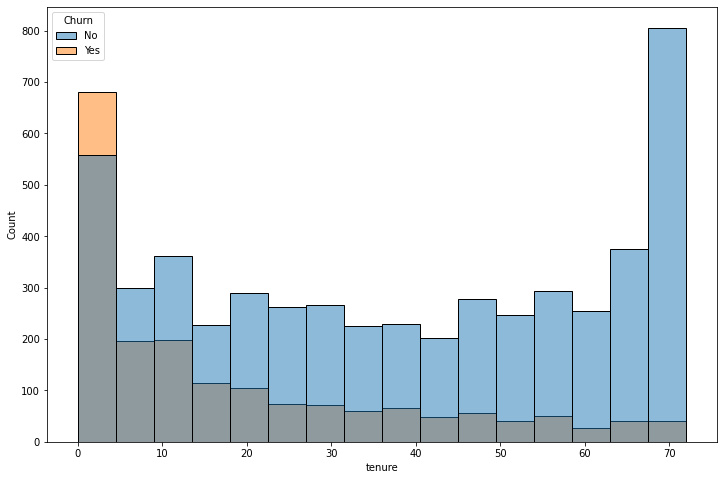

In [ ]:
sns.histplot(data=df, x='tenure', hue='Churn')

Observamos que à medida que o número de meses de relacionamento aumenta, a propensão ao churn diminui.

Por outro lado percebemos concentração nos extremos entre os clientes que não deram churn. 

Podemos considerar uma transformação para tornar esta variável mais próxima de uma distribuição normal, pois isso pode fazer com o que o algoritmo aprenda melhor. Mas por enquanto vamos apenas anotar isso para aplicar no futuro.

### Exercício 3:

Analise e interprete as distribuições das seguintes variáveis com relação ao churn e, se julgar necessário, com relação as demais categóricas.

* MonthlyCharges

* TotalCharges

### Exercício 4:

Qual é a melhor abordagem para lidar com os dados ausentes da variável **TotalCharges**? 

Analise, execute e justifique a escolha.

In [ ]:
df_new.isna().sum()

Churn                                       0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
gender_Female                               0
gender_Male                                 0
SeniorCitizen_No                            0
SeniorCitizen_Yes                           0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service

In [ ]:
df_new = df_new[~df_new['TotalCharges'].isna()].copy()

# Modelagem

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

## Separação Holdout



In [ ]:
X = df_new.drop(columns='Churn') # Características
y = df_new['Churn'] # Resposta

In [ ]:
# Amostragem 30% treino e 70% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Random Forest

### Modelo 1

Random Forest com os hiperparâmetros default

In [ ]:
# Instancia o classificador Random Forest:

model1 = RandomForestClassifier(random_state=100)

In [ ]:
# Treina o modelo:

model1.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [ ]:
# Função para plotar as métricas:
def print_metrics(clf, X, y):
  y_pred = clf.predict(X)
  y_prob = clf.predict_proba(X).T[1]

  acuracia = accuracy_score(y, y_pred)
  sensibilidade = recall_score(y, y_pred)
  especificidade = recall_score(y, y_pred, pos_label=0)
  precisao = precision_score(y, y_pred)
  auc = roc_auc_score(y, y_prob)

  print(f'Acurácia: {acuracia:.2f}')
  print(f'Sensibilidade (recall): {sensibilidade:.2f}')
  print(f'Especificidade: {especificidade:.2f}')
  print(f'Precisão: {precisao:.2f}')
  print(f'AUC: {auc:.2f}')

In [ ]:
# Métricas de treino:
print_metrics(model1, X_train, y_train)

Acurácia: 1.00
Sensibilidade (recall): 1.00
Especificidade: 1.00
Precisão: 1.00
AUC: 1.00


In [ ]:
# Métricas de teste:
print_metrics(model1, X_test, y_test)

Acurácia: 0.78
Sensibilidade (recall): 0.49
Especificidade: 0.88
Precisão: 0.62
AUC: 0.81


In [ ]:
# Hiperparâmetros padrão selecionados
model1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

### Exercício 5

Analise as métricas do *modelo 1*, decida se este modelo pode ser entregue à área de negócio, justificando a sua resposta.


Lembrando que:

**Acurácia**: taxa de acerto global do modelo 

**Sensibilidade (recall)**: Taxa de verdadeiros positivos entre os churns observados 

**Especificidade**: Taxa de verdadeiros negativos entre os não churns observados

**Precisão**: Taxa de verdadeiros positivos entre os churns preditos

**AUC**: Área sob a curva ROC. Quanto maior, maior a capacidade do modelo em separar as classes (churn=1 e churn=0)

**Resposta:**

[Clique duas vezes aqui para editar a sua resposta]

<br>

### Modelo 2

Ajustando o hiperparâmetro:


* **max_depth**: profundidade máxima das árvores
  * quanto mais profunda a árvore, maior o número de folhas e, consequentemente, menor o número de observações por folha

  <br>

In [ ]:
# Verificando a profundidade e o número de folhas das 10 primeiras árvores do modelo 1:

for i in range(10):
  depth = model1.estimators_[i].get_depth()
  leaves = model1.estimators_[i].get_n_leaves()
  print(f'Árvore {i+1} - Profundidade: {depth} / Folhas: {leaves}')

Árvore 1 - Profundidade: 22 / Folhas: 1029
Árvore 2 - Profundidade: 23 / Folhas: 1029
Árvore 3 - Profundidade: 24 / Folhas: 1050
Árvore 4 - Profundidade: 23 / Folhas: 1042
Árvore 5 - Profundidade: 22 / Folhas: 1047
Árvore 6 - Profundidade: 20 / Folhas: 1068
Árvore 7 - Profundidade: 23 / Folhas: 1051
Árvore 8 - Profundidade: 21 / Folhas: 1064
Árvore 9 - Profundidade: 28 / Folhas: 1061
Árvore 10 - Profundidade: 21 / Folhas: 1012


In [ ]:
X_train.shape

(4922, 46)

In [ ]:
# De forma grosseira, aproximadamente 5 observações por folha nessas 10 primeiras árvores
4922/1000

4.922

In [ ]:
# Instancia e treina o classificador Random Forest com os hiperparâmetros abaixo:

params = {
    'random_state': 100, 
    'max_depth': 7}

model2 = RandomForestClassifier(**params).fit(X_train, y_train)

In [ ]:
# Métricas de treino:
print_metrics(model2, X_train, y_train)

Acurácia: 0.82
Sensibilidade (recall): 0.54
Especificidade: 0.93
Precisão: 0.72
AUC: 0.89


In [ ]:
# Métricas de teste:
print_metrics(model2, X_test, y_test)

Acurácia: 0.79
Sensibilidade (recall): 0.51
Especificidade: 0.90
Precisão: 0.66
AUC: 0.84


In [ ]:
# Verificando a profundidade e o número de folhas das 10 primeiras árvores do modelo 2:

for i in range(10):
  depth = model2.estimators_[i].get_depth()
  leaves = model2.estimators_[i].get_n_leaves()
  print(f'Árvore {i+1} - Profundidade: {depth} / Folhas: {leaves}')

Árvore 1 - Profundidade: 7 / Folhas: 96
Árvore 2 - Profundidade: 7 / Folhas: 84
Árvore 3 - Profundidade: 7 / Folhas: 79
Árvore 4 - Profundidade: 7 / Folhas: 107
Árvore 5 - Profundidade: 7 / Folhas: 91
Árvore 6 - Profundidade: 7 / Folhas: 103
Árvore 7 - Profundidade: 7 / Folhas: 101
Árvore 8 - Profundidade: 7 / Folhas: 104
Árvore 9 - Profundidade: 7 / Folhas: 84
Árvore 10 - Profundidade: 7 / Folhas: 93


In [ ]:
# Verificando o número de folhas nas 5 primeiras árvores do modelo 2:

for i in range(10):
  print(model2.estimators_[i].get_n_leaves())

96
84
79
107
91
103
101
104
84
93


In [ ]:
# De forma grosseira, aproximadamente 35 observações por folha nessas 10 primeiras árvores
4922/140

35.15714285714286

### Exercício 6

Explique a diferença nas métricas do modelo 2 com relação ao modelo 1, e decida, entre os dois modelos, qual você escolheria para entregar para a área de negócio.

**Resposta:**

[Clique duas vezes aqui para editar a sua resposta]

<br>

### Modelo 3

Ajustando o hiperparâmetro:

* **class_weight**: usa os valores de y para ajustar os pesos das classes de forma inversamente proporcional
  * últil em dados desbalanceados

In [ ]:
# Relembrando que as classes estão desbalanceadas:

df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [ ]:
# Instancia e treina o classificador Random Forest com os hiperparâmetros abaixo:

params = {
    'random_state': 100, 
    'max_depth': 7, 
    'class_weight': 'balanced'}

model3 = RandomForestClassifier(**params).fit(X_train, y_train)

In [ ]:
# Métricas de treino:
print_metrics(model3, X_train, y_train)

Acurácia: 0.79
Sensibilidade (recall): 0.84
Especificidade: 0.77
Precisão: 0.56
AUC: 0.89


In [ ]:
# Métricas de teste:
print_metrics(model3, X_test, y_test)

Acurácia: 0.74
Sensibilidade (recall): 0.75
Especificidade: 0.74
Precisão: 0.52
AUC: 0.84


**Importância das features**

Feature importance: cálculo baseado no ganho de informação de cada split da árvore

In [ ]:
# Função para gerar e plotar a importância das features

def plot_importances(model, X):
  feature_importance = model.feature_importances_
  feature_names = X.columns

  data={'feature_names':feature_names,'feature_importance':feature_importance}
  df_imp = pd.DataFrame(data).sort_values(by='feature_importance', ascending=False).reset_index(drop=True)

  sns.barplot(data=df_imp, x='feature_names', y='feature_importance')
  plt.xticks(rotation=90)

  return df_imp

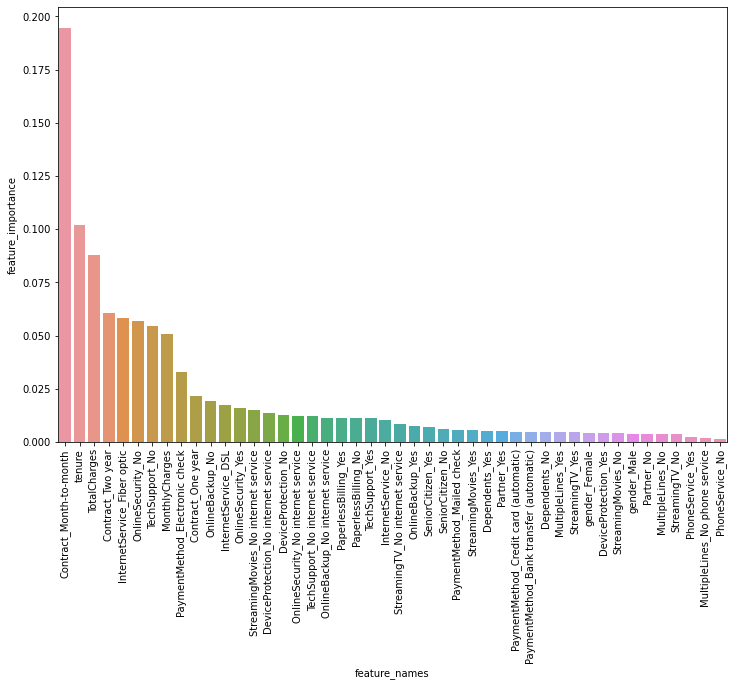

In [ ]:
df_imp = plot_importances(model3, X_train)

In [ ]:
df_imp

,feature_names,feature_importance
0,Contract_Month-to-month,0.194714
1,tenure,0.102099
2,TotalCharges,0.087849
3,Contract_Two year,0.060604
4,InternetService_Fiber optic,0.058239
5,OnlineSecurity_No,0.056947
6,TechSupport_No,0.054502
7,MonthlyCharges,0.050824
8,PaymentMethod_Electronic check,0.033019
9,Contract_One year,0.021531


### Exercício 7

Explique a diferença nas métricas do modelo 3 com relação ao modelo 2, e decida, entre os modelos 1, 2 e 3 qual você escolheria para entregar para a área de negócio.

**Resposta:**

[Clique duas vezes aqui para editar a sua resposta]

<br>

### Modelo 5


In [ ]:
import optuna
from sklearn import model_selection

Novos hiperparâmetros:

* **min_samples_split**: número mínimo de observações necessárias para dividir um nó

* **min_samples_leaf**: número mínimo de observações por folha

* **n_estimators**: número de árvores na floresta

* **max_features**: número máximo de features por árvore

<br>

Agora aplicaremos um método automático para encontrar a combinação ótima de hiperparâmetros.


In [ ]:
# Função objetivo:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 4, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 300, 1000)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 30, 80)
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt'])
    class_weight = trial.suggest_categorical('class_weight', ['balanced','balanced_subsample'])
    
    clf = RandomForestClassifier(
        random_state=100, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features,
        n_estimators = n_estimators,
        class_weight=class_weight,
        n_jobs=-1)
    
    score = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    penalized_score = score.mean() - (score.std()*0.05) # penaliza o desvio padrão

    return penalized_score

In [ ]:
# Executando 5 tentativas de combinações:

n_tentativas = 5
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=n_tentativas)

[I 2022-05-18 14:51:13,488] A new study created in memory with name: no-name-cf0ce8cb-568a-43f6-be82-0d18fc35e5a5
[I 2022-05-18 14:51:36,650] Trial 0 finished with value: 0.8367683290504299 and parameters: {'max_depth': 7, 'min_samples_split': 419, 'min_samples_leaf': 68, 'n_estimators': 514, 'max_features': None, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.8367683290504299.
[I 2022-05-18 14:51:49,919] Trial 1 finished with value: 0.8296167401104652 and parameters: {'max_depth': 6, 'min_samples_split': 874, 'min_samples_leaf': 61, 'n_estimators': 469, 'max_features': None, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8367683290504299.
[I 2022-05-18 14:51:58,077] Trial 2 finished with value: 0.8368754658382003 and parameters: {'max_depth': 7, 'min_samples_split': 724, 'min_samples_leaf': 68, 'n_estimators': 455, 'max_features': 'sqrt', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8368754658382003.
[I 2022-05-18 14:52:16,854] Trial 3 f

In [ ]:
print(f"Melhor métrica: \n{study.best_value}")

Melhor métrica: 
0.8405109434971401


In [ ]:
print(f"Melhores hiperparâmetros: \n{study.best_params}")

Melhores hiperparâmetros: 
{'max_depth': 9, 'min_samples_split': 324, 'min_samples_leaf': 65, 'n_estimators': 806, 'max_features': 'sqrt', 'class_weight': 'balanced_subsample'}


In [ ]:
# Instancia e treina o classificador Random Forest com os hiperparâmetros encontrados com o Optuna:

model5 = RandomForestClassifier(**study.best_params, random_state=100).fit(X_train, y_train)

In [ ]:
# Métricas de treino:
print_metrics(model5, X_train, y_train)

Acurácia: 0.75
Sensibilidade (recall): 0.82
Especificidade: 0.73
Precisão: 0.52
AUC: 0.85


In [ ]:
# Métricas de teste:
print_metrics(model5, X_test, y_test)

Acurácia: 0.73
Sensibilidade (recall): 0.77
Especificidade: 0.71
Precisão: 0.50
AUC: 0.83


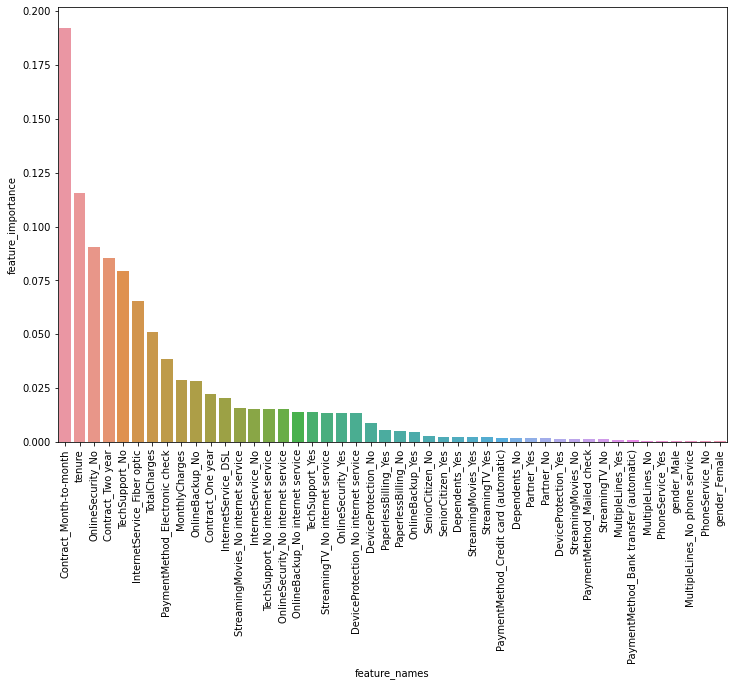

In [ ]:
# Plotando a importância das features

df_imp = plot_importances(model5, X_train)

Observe que as importâncias podem variar de acordo com os hiperparâmetros selecionados.

### Exercício 8

Execute mais tentativas para encontrar a combinação ótima de hiperparâmetros, treine e valide novamente o modelo 5, compare com os modelos anteriores e justifique qual deles você escolheria para entregar para a área de negócio.

**Resposta:**

[Clique duas vezes aqui para editar a sua resposta]

<br>

### Modelo 6

Vamos tentar reduzir a complexidade do modelo.

In [ ]:
# Verificando as imporâncias do modelo 5:

df_imp

,feature_names,feature_importance
0,Contract_Month-to-month,0.192353
1,tenure,0.115646
2,OnlineSecurity_No,0.090369
3,Contract_Two year,0.085452
4,TechSupport_No,0.079232
5,InternetService_Fiber optic,0.065610
6,TotalCharges,0.050971
7,PaymentMethod_Electronic check,0.038694
8,MonthlyCharges,0.028880
9,OnlineBackup_No,0.028117


In [ ]:
# Criando uma soma acumulada das importâncias:

df_imp['importance_cumsum'] = df_imp['feature_importance'].cumsum()

In [ ]:
df_imp

,feature_names,feature_importance,importance_cumsum
0,Contract_Month-to-month,0.192353,0.192353
1,tenure,0.115646,0.307998
2,OnlineSecurity_No,0.090369,0.398367
3,Contract_Two year,0.085452,0.483819
4,TechSupport_No,0.079232,0.563050
5,InternetService_Fiber optic,0.065610,0.628660
6,TotalCharges,0.050971,0.679631
7,PaymentMethod_Electronic check,0.038694,0.718325
8,MonthlyCharges,0.028880,0.747206
9,OnlineBackup_No,0.028117,0.775323


Observamos que 80% da feature_importance está concentrada em um conjunto pequeno de variáveis.

In [ ]:
# Selecionando somente as features que concentram aproximadamente 80% da importância

selected_features = df_imp[~(df_imp['importance_cumsum'] > 0.8)]['feature_names']
selected_features

0            Contract_Month-to-month
1                             tenure
2                  OnlineSecurity_No
3                  Contract_Two year
4                     TechSupport_No
5        InternetService_Fiber optic
6                       TotalCharges
7     PaymentMethod_Electronic check
8                     MonthlyCharges
9                    OnlineBackup_No
10                 Contract_One year
Name: feature_names, dtype: object

In [ ]:
# Instancia e treina o classificador Random Forest com os hiperparâmetros abaixo e com as features selecionadas


# Nota:

  # Observe que estamos usando o vetor "selected_features" na função .fit()

  # Observe que vamos usar os mesmos hiperparâmetros do modelo 5


model6 = RandomForestClassifier(**study.best_params).fit(X_train[selected_features], y_train)

In [ ]:
# Métricas de treino:
print_metrics(model6, X_train[selected_features], y_train)

Acurácia: 0.76
Sensibilidade (recall): 0.80
Especificidade: 0.74
Precisão: 0.52
AUC: 0.85


In [ ]:
# Métricas de teste:
print_metrics(model6, X_test[selected_features], y_test)

Acurácia: 0.73
Sensibilidade (recall): 0.75
Especificidade: 0.72
Precisão: 0.51
AUC: 0.84


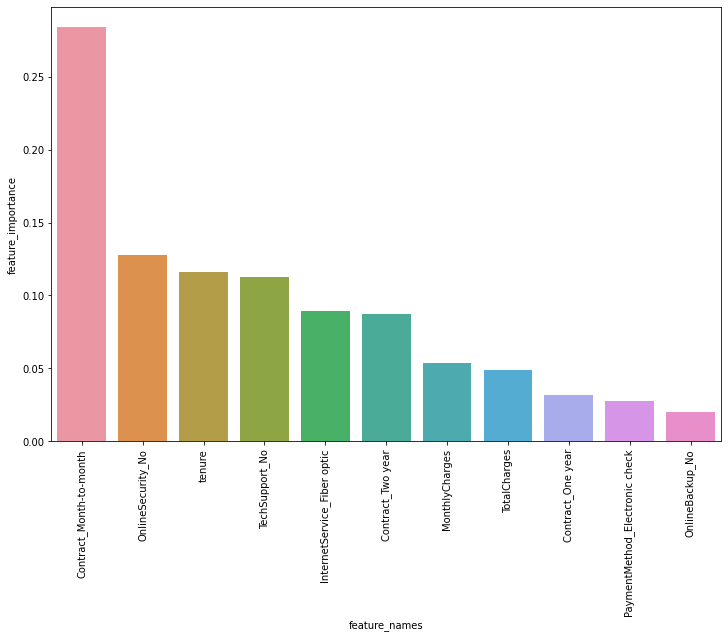

In [ ]:
# Plotando a importância das features

df_imp = plot_importances(model6, X_train[selected_features])

In [ ]:
df_imp

,feature_names,feature_importance
0,Contract_Month-to-month,0.283826
1,OnlineSecurity_No,0.127658
2,tenure,0.116199
3,TechSupport_No,0.112649
4,InternetService_Fiber optic,0.089689
5,Contract_Two year,0.087545
6,MonthlyCharges,0.053381
7,TotalCharges,0.048599
8,Contract_One year,0.032055
9,PaymentMethod_Electronic check,0.027975


### Exercício 9

Compare os resultados dos modelos 6 e 5, decida qual deles você entregaria para a área de negócio e justifique a sua resposta.

**Resposta:**

[Clique duas vezes aqui para editar a sua resposta]

<br>

### Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Função para plotar a matriz de confusão:

def plot_conf_matrix(clf, X, y):
  y_pred = clf.predict(X)

  cm = confusion_matrix(y, y_pred, labels=clf.classes_)

  ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

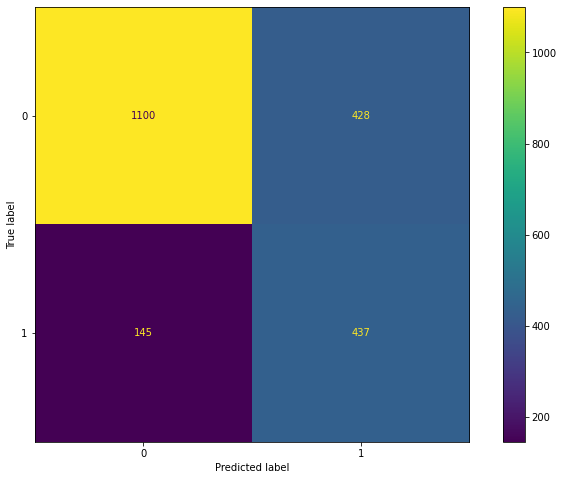

In [ ]:
# Matriz de confusão do modelo 6

plot_conf_matrix(model6, X_test[selected_features], y_test)

### Curva ROC

In [ ]:
from sklearn.metrics import RocCurveDisplay

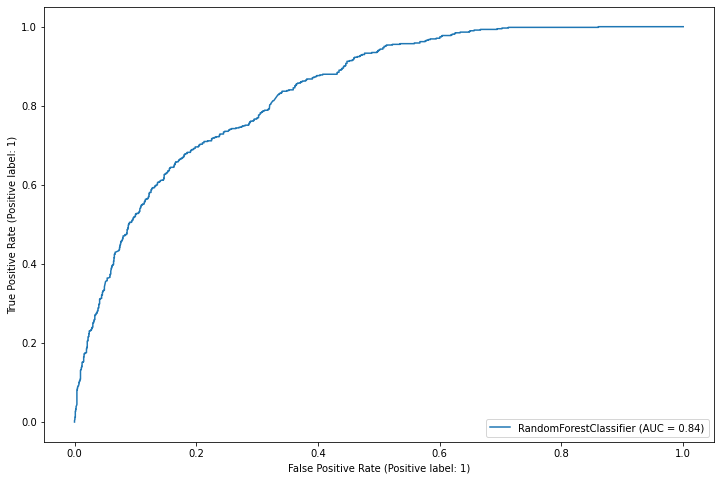

In [ ]:
# Curva ROC do modelo 6:

RocCurveDisplay.from_estimator(model6, X_test[selected_features], y_test, response_method='predict_proba')